# AI-MINOR-NOV  by Siddhartha Sinha

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [316]:
df = pd.read_csv('C:/Users/KIIT/Documents/VERZEO/AI-NOV-MINOR/heart.csv')

In [317]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [318]:
df.isnull().values.any()

False

In [319]:
df.shape

(303, 14)

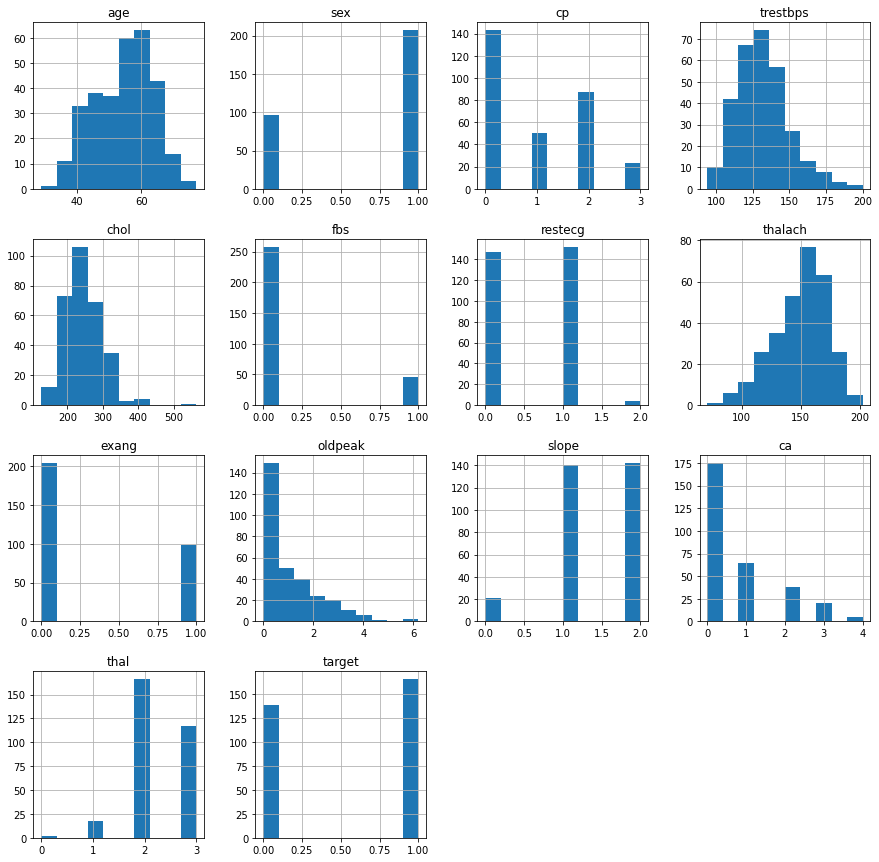

In [320]:
df.hist(figsize = (15, 15))
plt.show()

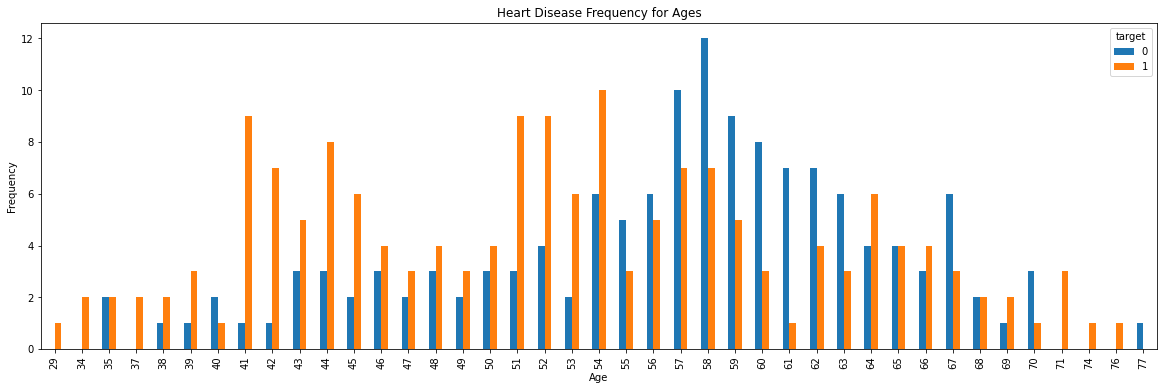

In [321]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

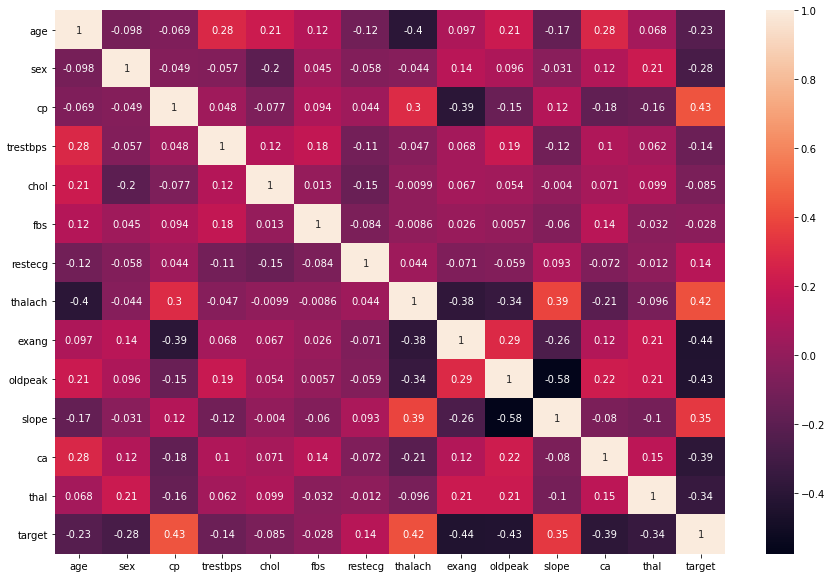

In [322]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

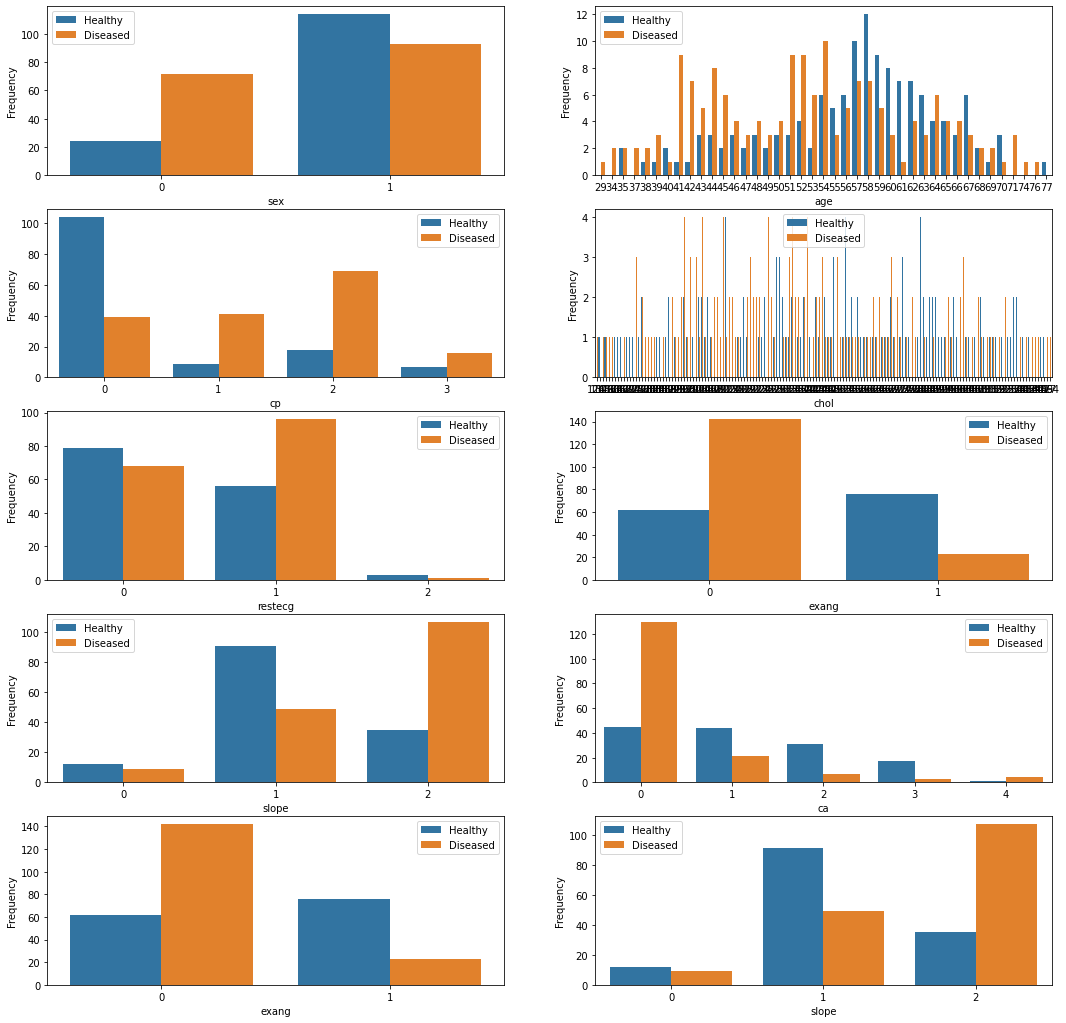

In [323]:
fig, axes = plt.subplots(5, 2, figsize=(18,18))
fs = ['sex','age','cp', 'chol','restecg','exang', 'slope', 'ca', 'exang', 'slope']
for i, axis in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='target', data=df, ax=axis) 
    axis.set(ylabel='Frequency')
    axis.legend(["Healthy", "Diseased"])

In [324]:
X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

In [325]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [326]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [327]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [328]:

    model = Sequential()
    model.add(Dense(activation='relu',units=16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(Dense(activation='relu',units=16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(Dense(activation='relu',units=16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

In [329]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [330]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=8)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5950 - val_loss: 0.6822 - val_accuracy: 0.6885
Epoch 2/50
242/242 [==============================] - 0s 407us/step - loss: 0.6680 - accuracy: 0.6901 - val_loss: 0.6430 - val_accuracy: 0.7705
Epoch 3/50
242/242 [==============================] - 0s 426us/step - loss: 0.6011 - accuracy: 0.8182 - val_loss: 0.5723 - val_accuracy: 0.7869
Epoch 4/50
242/242 [==============================] - 0s 423us/step - loss: 0.5302 - accuracy: 0.8347 - val_loss: 0.5057 - val_accuracy: 0.8033
Epoch 5/50
242/242 [==============================] - 0s 451us/step - loss: 0.4541 - accuracy: 0.8347 - val_loss: 0.4548 - val_accuracy: 0.8197
Epoch 6/50
242/242 [==============================] - 0s 438us/step - loss: 0.4223 - accuracy: 0.8471 - val_loss: 0.4241 - val_accuracy: 0.8033
Epoch 7/50
242/242 [==============================] - 0s 464us/step - loss: 0.4006 - accuracy

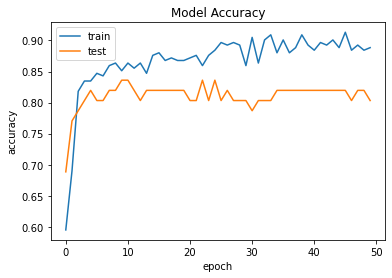

In [331]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

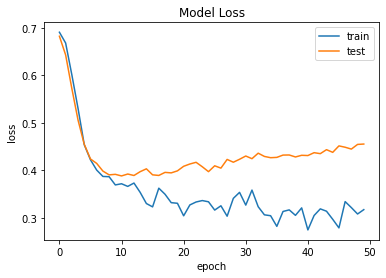

In [332]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [333]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8032786885245902
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

